In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-m/Model/2.O.py
/kaggle/input/yolo-m/Model/1.py
/kaggle/input/yolo-m/Model/yolo11n.pt
/kaggle/input/yolo-m/Model/3.py
/kaggle/input/yolo-m/Model/psoimplement.py
/kaggle/input/yolo-m/Model/data.yaml
/kaggle/input/yolo-m/Model/yolov8s.pt
/kaggle/input/yolo-m/Model/5.py
/kaggle/input/yolo-m/Model/2.O1.py
/kaggle/input/yolo-m/Model/2.py
/kaggle/input/yolo-m/Model/file.ipynb
/kaggle/input/yolo-m/Model/4.py
/kaggle/input/yolo-m/Model/2.O2.py
/kaggle/input/yolo-m/Model/yolov8n.pt
/kaggle/input/yolo-m/Model/yolov8l.pt
/kaggle/input/yolo-m/Model/new.py
/kaggle/input/yolo-m/Model/augmented_data.py
/kaggle/input/yolo-m/Model/runs/detect/train4/events.out.tfevents.1728323770.da62eb3ffa2d.1151.0
/kaggle/input/yolo-m/Model/runs/detect/train4/args.yaml
/kaggle/input/yolo-m/Model/runs/detect/train4/labels.jpg
/kaggle/input/yolo-m/Model/runs/detect/train4/train_batch2.jpg
/kaggle/input/yolo-m/Model/runs/detect/train4/train_batch1.jpg
/kaggle/input/yolo-m/Model/runs/detect/train4/train

In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 30.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os
from pathlib import Path


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Define the path to the dataset
dataset_path = Path('/kaggle/input/yolo-m/Model/datasets')
train_images_path = dataset_path / 'images' / 'train'
train_labels_path = dataset_path / 'labels' / 'train'
val_images_path = dataset_path / 'images' / 'val'
val_labels_path = dataset_path / 'labels' / 'val'



In [7]:
# Define dataset configuration
dataset_config = {
    'path': str('/kaggle/input/yolo-m/Model/datasets'),
    'train': 'images/train',   # Relative to dataset_path
    'val': 'images/val',       # Relative to dataset_path
    'names': ['artwork', 'bed', 'lamp', 'night stand', 'plant', 'sofa', 'wall mirror']  # Replace with your actual class names
}



In [9]:

import os

# Step 1: List files in the 'Model' directory
model_path = Path(dataset_path) / 'Model'
print("Files in Model directory:")
print(os.listdir(model_path))  # List all files in the Model directory





Files in Model directory:


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/yolo-m/Model/datasets/Model'

In [10]:
import yaml
from pathlib import Path
import kagglehub

# Step 1: Download the dataset
dataset_path = kagglehub.dataset_download('nikhil7482/yolo-m')

# Step 2: Construct the path to the Model directory
model_path = Path(dataset_path) / 'Model'

# Step 3: Construct the path to the YAML file
yaml_file_path = model_path / 'data.yaml'  # Update this path accordingly

# Step 4: Initialize the data variable
data = None

# Step 5: Load the YAML configuration
try:
    with open(yaml_file_path, 'r') as f:
        data = yaml.safe_load(f)
except FileNotFoundError:
    print(f"File not found: {yaml_file_path}")
except yaml.YAMLError as e:
    print(f"Error loading YAML file: {e}")

# Step 6: Check if data was loaded successfully before printing
if data is not None:
    print(data)
else:
    print("No data loaded.")


{'path': '.', 'test': 'test/images', 'train': 'train/images', 'val': 'valid/images', 'nc': 7, 'names': ['artwork', 'bed', 'lamp', 'night stand', 'plant', 'sofa', 'wall mirror']}


In [11]:
# Step 1: Verify the loaded configuration
print("Loaded dataset configuration:")
print(data)


Loaded dataset configuration:
{'path': '.', 'test': 'test/images', 'train': 'train/images', 'val': 'valid/images', 'nc': 7, 'names': ['artwork', 'bed', 'lamp', 'night stand', 'plant', 'sofa', 'wall mirror']}


In [12]:
import os
from pathlib import Path

# Path to the downloaded dataset
dataset_path = Path('/kaggle/input/yolo-m/Model/datasets')  # Adjust this path as necessary

# List all files and directories in the dataset directory
print("Files in dataset directory:")
print(os.listdir(dataset_path))  # List all files in the directory


Files in dataset directory:
['valid', 'test', 'train']


In [13]:
import os
from pathlib import Path

dataset_path = Path('/kaggle/input/yolo-mo/Model/datasets')  # Adjust this path

# List contents of each directory
for sub_dir in ['train', 'valid', 'test']:
    print(f"Contents of {sub_dir} directory:")
    print(os.listdir(dataset_path / sub_dir))


Contents of train directory:
['labels', 'labels.cache', 'images']
Contents of valid directory:
['labels', 'labels.cache', 'images']
Contents of test directory:
['labels', 'images']


In [14]:
from pathlib import Path

# Step 1: Define the path for the new data.yaml file in a writable directory
yaml_file_path = Path('/kaggle/working/data.yaml')

# Step 2: Create the YAML content
yaml_content = """
train: train/images
val: valid/images
test: test/images
nc: 7
names:
  - artwork
  - bed
  - lamp
  - night stand
  - plant
  - sofa
  - wall mirror
"""

# Step 3: Write the YAML content to a file
with open(yaml_file_path, 'w') as f:
    f.write(yaml_content.strip())

print(f"Created YAML file at: {yaml_file_path}")


print(f"Created YAML file at: {yaml_file_path}")


Created YAML file at: /kaggle/working/data.yaml
Created YAML file at: /kaggle/working/data.yaml


In [ ]:
# # Load the YAML configuration for verification
# import yaml

# yaml_file_path = '/kaggle/working/data.yaml'

# with open(yaml_file_path) as f:
#     data = yaml.safe_load(f)
# print("Loaded dataset configuration:", data)


In [ ]:
# yaml_content = f"""
# train: {Path('/kaggle/input/yolo-m/Model/datasets/train')}
# val: {Path('/kaggle/input/yolo-m/Model/datasets/valid')}
# test: {Path('/kaggle/input/yolo-m/Model/datasets/test')}
# nc: 7
# names: {['artwork', 'bed', 'lamp', 'night stand', 'plant', 'sofa', 'wall mirror']}
# """
# with open(yaml_file_path, 'w') as f:
#     f.write(yaml_content.strip())


In [ ]:
!pip install ultralytics


In [15]:
import os
from ultralytics import YOLO

# Create the YAML file if it doesn't exist
# yaml_content = """
# train: /kaggle/input/yolo-m/Model/datasets/train
# val: /kaggle/input/yolo-m/Model/datasets/valid
# test: /kaggle/input/yolo-m/Model/datasets/test
# nc: 7
# names: ['artwork', 'bed', 'lamp', 'night stand', 'plant', 'sofa', 'wall mirror']
# """

yaml_file_path = '/kaggle/input/yolo-mo/Model/data.yaml'
# with open(yaml_file_path, 'w') as f:
#     f.write(yaml_content.strip())

# print(f"Created YAML file at: {yaml_file_path}")

# Check contents of the working directory
print("Contents of /kaggle/input/yolo-mo/Model:", os.listdir('/kaggle/input/yolo-mo/Model'))

# Step 1: Initialize the YOLO model
model = YOLO('yolov8n.pt')

# Step 3: Train the model using the saved YAML configuration file
model.train(
    data=yaml_file_path,  # Use the path of the YAML file
    epochs=200,           # Number of epochs for training
    imgsz=640,            # Image size for training
    batch=16,             
    patience=180,         
    name='custom_yolov8'  # Experiment name
)


Contents of /kaggle/input/yolo-mo/Model: ['runs', '2.O.py', '1.py', 'datasets', 'yolo11n.pt', '3.py', 'psoimplement.py', 'data.yaml', 'yolov8s.pt', '5.py', '2.O1.py', '2.py', 'file.ipynb', '4.py', '2.O2.py', 'yolov8n.pt', 'yolov8l.pt', 'new.py', 'augmented_data.py']


100%|██████████| 6.25M/6.25M [00:00<00:00, 165MB/s]


Ultralytics 8.3.8 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/yolo-mo/Model/data.yaml, epochs=200, time=None, patience=180, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 36.7MB/s]
2024-10-09 11:07:45,531	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-09 11:07:46,128	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 163MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-m/Model/datasets/train/labels... 2220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2220/2220 [00:08<00:00, 270.67it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-m/Model/datasets/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15455, len(boxes) = 24657. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/yolo-m/Model/datasets/valid/labels... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 249.04it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-m/Model/datasets/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 105, len(boxes) = 210. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/custom_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/custom_yolov8
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.56G      2.138       3.63      2.026        221        640: 100%|██████████| 139/139 [00:30<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         27        210      0.568      0.146      0.165      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.58G      1.984       3.05      1.941        201        640: 100%|██████████| 139/139 [00:27<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         27        210      0.601       0.16      0.185      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.57G       1.93      2.844      1.939        253        640: 100%|██████████| 139/139 [00:27<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         27        210      0.529      0.227      0.253      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.58G      1.883      2.763      1.899        224        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         27        210      0.478      0.271      0.262      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.54G      1.832      2.685      1.853        268        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         27        210      0.293      0.277      0.256       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.55G      1.808      2.645      1.839        245        640: 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         27        210      0.554      0.281      0.276      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.58G      1.773      2.584       1.82        254        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         27        210      0.418      0.286      0.294       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.54G      1.736      2.537       1.79        263        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         27        210       0.41      0.318      0.301      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.57G      1.717      2.505      1.771        186        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         27        210      0.337      0.324      0.315      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.59G      1.685      2.476      1.754        250        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         27        210      0.489      0.327      0.317      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.52G      1.661      2.429      1.727        167        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         27        210      0.328      0.323      0.306      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.59G      1.658      2.411      1.728        195        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         27        210      0.402        0.3      0.303      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.63G      1.642      2.385       1.71        263        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         27        210      0.364      0.298      0.307      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.52G      1.636      2.382      1.708        202        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         27        210      0.318      0.395      0.327      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.69G      1.624      2.337      1.696        294        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         27        210      0.302      0.413      0.303      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.55G      1.607      2.318      1.683        231        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         27        210       0.35      0.414      0.346      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.56G      1.613      2.318      1.689        278        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         27        210      0.419      0.394      0.358      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.53G      1.577      2.286      1.666        222        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         27        210      0.352      0.384       0.35      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.54G      1.576      2.271      1.657        209        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         27        210      0.301      0.432      0.319      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.58G      1.575      2.243      1.658        276        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


                   all         27        210      0.346      0.414      0.364      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.58G      1.564      2.229      1.654        253        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         27        210      0.291      0.445      0.334      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.67G      1.545      2.215      1.643        241        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         27        210      0.399      0.367      0.364      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.54G      1.544      2.186      1.634        261        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         27        210      0.341      0.401      0.356      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.71G      1.552      2.213      1.639        171        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         27        210      0.281      0.428      0.321      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.66G      1.541      2.189      1.627        240        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         27        210      0.407      0.398      0.388      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.74G      1.521      2.165      1.614        166        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         27        210      0.314       0.42      0.354      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.57G       1.52      2.146      1.607        236        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         27        210       0.49       0.41      0.321      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.57G      1.507      2.135      1.608        181        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         27        210      0.341      0.454      0.382       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.58G      1.519      2.128      1.606        254        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         27        210      0.466      0.405      0.325      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.54G        1.5      2.103      1.596        183        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         27        210      0.385      0.422      0.363      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.56G      1.489      2.097      1.594        216        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         27        210      0.421      0.403      0.408       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.59G      1.488      2.068      1.582        194        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         27        210       0.42      0.409      0.362      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.56G      1.492      2.076      1.592        178        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         27        210      0.551      0.369      0.411      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.56G      1.473      2.055      1.578        217        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         27        210      0.382      0.495      0.406      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.52G      1.479      2.075      1.588        241        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         27        210      0.353      0.523      0.355      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.56G      1.469      2.057      1.582        264        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         27        210      0.373      0.501      0.367       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.51G      1.456      2.022      1.561        251        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         27        210      0.363      0.499      0.419      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.57G      1.464      2.028      1.568        271        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         27        210      0.431      0.403      0.387      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200       2.5G      1.446      2.003       1.56        245        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         27        210      0.288      0.476      0.357      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.67G      1.441       2.01      1.554        236        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         27        210      0.557      0.395      0.377      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.61G      1.442      2.005       1.56        264        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         27        210      0.286        0.5      0.308      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.53G      1.441      1.994      1.554        271        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         27        210      0.478      0.372      0.394      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.56G      1.442      1.986      1.554        196        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         27        210       0.35       0.49      0.419       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.53G      1.438      1.984      1.554        238        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all         27        210      0.397      0.483      0.418      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.52G      1.434      1.976      1.546        231        640: 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         27        210      0.337      0.523      0.427      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200       2.6G      1.424      1.976      1.545        219        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         27        210      0.398      0.459      0.432      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.59G      1.414       1.96      1.541        231        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         27        210      0.349      0.444      0.361       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.57G      1.412      1.946      1.534        234        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         27        210      0.461      0.357      0.427      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.52G      1.412      1.956      1.535        208        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         27        210      0.436       0.41      0.459      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.59G      1.403      1.934      1.529        203        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         27        210      0.431      0.482      0.428       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.51G      1.411      1.942      1.531        280        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         27        210      0.574      0.425      0.482      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.57G      1.398       1.91       1.51        226        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         27        210      0.393      0.512      0.432      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.51G      1.399      1.915      1.522        304        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         27        210      0.427      0.549       0.48      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.53G      1.397      1.898      1.515        274        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         27        210       0.72      0.459      0.559       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.61G      1.385      1.892      1.513        157        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         27        210       0.46      0.512      0.504      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.59G      1.381      1.904      1.519        300        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         27        210      0.434      0.593       0.53      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200       2.6G      1.387      1.875      1.509        272        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         27        210      0.451      0.555      0.491      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       2.6G       1.39      1.894      1.515        226        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         27        210      0.424      0.506      0.435      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.54G      1.369      1.869      1.502        229        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         27        210      0.439      0.473      0.457      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.54G      1.364      1.852      1.498        288        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         27        210      0.584      0.441      0.496      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.59G      1.372      1.859      1.498        237        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         27        210      0.422      0.553      0.475      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.59G      1.363      1.837      1.492        209        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         27        210      0.471      0.477      0.488      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.66G      1.363       1.83      1.485        324        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         27        210      0.427       0.56      0.505      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.57G      1.371      1.833      1.493        226        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         27        210      0.584      0.444      0.512      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.57G      1.359       1.82      1.485        232        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         27        210      0.401      0.498      0.482      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.54G      1.348        1.8      1.472        201        640: 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         27        210      0.529      0.477      0.513      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.57G      1.356      1.826      1.485        159        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         27        210      0.568      0.514      0.567      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.51G      1.353      1.811      1.471        268        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         27        210        0.5      0.488      0.474      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.56G      1.345      1.808      1.476        188        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         27        210      0.632      0.459      0.526      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.54G      1.341      1.811      1.479        279        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         27        210      0.485      0.637      0.588      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.61G       1.35      1.798      1.479        182        640: 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         27        210      0.686      0.476      0.572      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.53G      1.344      1.789      1.475        158        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         27        210      0.505      0.623      0.593      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.52G       1.35      1.793      1.478        153        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         27        210      0.459       0.53      0.548      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.58G      1.331      1.778      1.461        257        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         27        210      0.496      0.648      0.586      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.54G      1.335      1.777      1.466        231        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         27        210      0.493       0.63      0.565      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.57G      1.326      1.764      1.466        234        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         27        210      0.548      0.577      0.574      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.57G      1.323      1.756      1.464        196        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         27        210      0.704      0.569      0.628       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.51G      1.318      1.734       1.45        259        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         27        210      0.534      0.652      0.601      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.58G      1.325      1.767      1.466        169        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         27        210      0.557       0.59      0.593      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.58G      1.314      1.737      1.454        216        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         27        210       0.46      0.651      0.514       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.63G      1.316      1.739      1.452        208        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         27        210      0.569      0.585      0.602      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.55G      1.308      1.717      1.446        229        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         27        210      0.728      0.529      0.629      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.56G      1.318      1.728      1.454        207        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         27        210      0.631      0.579      0.581      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.59G      1.315      1.721      1.456        202        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         27        210      0.517      0.672      0.616      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.53G      1.303      1.721      1.447        184        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


                   all         27        210      0.639      0.546        0.6       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.57G      1.306      1.721      1.445        291        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         27        210      0.568      0.592      0.597      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       2.6G      1.305       1.71      1.441        212        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         27        210      0.621      0.645      0.622      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.58G      1.307      1.685      1.441        218        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         27        210      0.682      0.532      0.622      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.53G      1.298      1.706      1.438        202        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         27        210      0.602       0.61       0.62      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.63G      1.298      1.689      1.436        168        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         27        210       0.67      0.648      0.649      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.56G      1.294      1.699      1.442        262        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         27        210       0.66      0.511      0.595      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.58G      1.282      1.668      1.429        252        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         27        210      0.494      0.646       0.56      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.62G      1.284      1.682      1.434        162        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         27        210      0.666      0.542      0.636      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.53G      1.284      1.679      1.428        240        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         27        210      0.581      0.524      0.575      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.55G       1.29      1.674      1.432        259        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         27        210      0.599      0.538      0.611      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.63G      1.274      1.652      1.423        240        640: 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         27        210      0.596      0.591      0.573      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.53G      1.277       1.66      1.419        230        640: 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


                   all         27        210      0.602      0.571      0.599      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.58G      1.275      1.653      1.424        236        640: 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         27        210       0.62      0.536      0.527      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.53G      1.278      1.639      1.423        198        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         27        210      0.599      0.602      0.621      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.66G      1.272      1.654      1.423        246        640: 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         27        210      0.648      0.562      0.612      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.53G      1.279      1.659      1.428        222        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         27        210      0.537      0.669      0.623      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       2.6G      1.268      1.626      1.413        217        640: 100%|██████████| 139/139 [00:26<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         27        210      0.627      0.647      0.652      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.56G      1.277      1.639      1.417        256        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         27        210      0.607      0.658      0.667      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.67G      1.272      1.639      1.423        181        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         27        210      0.599      0.623       0.62      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.55G      1.265      1.627      1.422        265        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         27        210      0.771      0.561      0.668      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.53G      1.256      1.624      1.411        237        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         27        210       0.78      0.544      0.645      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.53G      1.257      1.604      1.402        257        640: 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         27        210       0.65      0.598      0.642      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.56G      1.254      1.619      1.409        186        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         27        210      0.598      0.622      0.586      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.57G      1.258       1.61      1.413        250        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         27        210      0.677      0.554      0.637      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.62G      1.241      1.582      1.391        245        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         27        210      0.695      0.547      0.611      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.57G      1.246      1.583      1.399        164        640: 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         27        210      0.587      0.621      0.618      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.55G      1.234       1.56      1.393        168        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         27        210       0.67      0.619       0.65      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.72G      1.243      1.579      1.402        271        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         27        210      0.593      0.674      0.645      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.53G      1.237      1.552       1.39        168        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         27        210      0.571      0.652      0.651      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.61G      1.249      1.588      1.408        235        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         27        210      0.634      0.636      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.52G       1.24       1.55      1.396        265        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         27        210      0.688      0.593      0.647      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.52G      1.232      1.549      1.387        292        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         27        210      0.695      0.643      0.704      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.51G      1.241      1.563        1.4        205        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         27        210      0.727      0.602       0.68      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.71G      1.245      1.537      1.387        211        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         27        210      0.739      0.615      0.684      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.54G      1.233      1.558      1.388        253        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         27        210      0.648      0.618      0.655      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.54G      1.228      1.539      1.384        194        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         27        210      0.725       0.61      0.694      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.53G      1.223      1.523       1.38        178        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         27        210      0.739      0.619      0.696      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.55G       1.23      1.554      1.393        197        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         27        210      0.645      0.644      0.681       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.51G      1.225       1.53      1.382        193        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


                   all         27        210       0.64      0.634      0.676      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.61G      1.229      1.537      1.392        205        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         27        210      0.821      0.582      0.688       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.58G       1.23      1.544      1.385        235        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         27        210      0.668      0.661      0.694       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.52G      1.215      1.545      1.389        237        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         27        210      0.701      0.626      0.661      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.59G      1.207       1.51      1.379        184        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         27        210      0.648      0.611      0.652      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.53G      1.209      1.495      1.366        216        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         27        210      0.693      0.589      0.657      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.54G      1.217      1.499      1.373        247        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         27        210      0.732      0.578       0.66      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.53G      1.213       1.51      1.376        227        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         27        210      0.784      0.611      0.696      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.53G      1.207      1.522      1.378        234        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         27        210      0.707      0.681      0.702      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.67G      1.207      1.507      1.374        296        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         27        210       0.71      0.646      0.675      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.54G      1.209      1.496      1.369        208        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         27        210      0.692      0.618      0.688      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.52G      1.207      1.488      1.366        244        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         27        210      0.699      0.666      0.698      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.56G      1.203      1.492      1.363        177        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         27        210      0.782       0.64      0.723      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.58G      1.197      1.482      1.364        249        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         27        210      0.769      0.592      0.684      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.67G      1.208      1.487      1.367        247        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         27        210       0.69      0.684      0.693      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.54G      1.196      1.485      1.364        174        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         27        210      0.723      0.686      0.713      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.61G      1.193      1.471      1.365        225        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         27        210      0.808      0.592      0.699        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.58G      1.201       1.47      1.364        183        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         27        210      0.701      0.633      0.708      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.61G      1.191      1.461      1.358        262        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         27        210      0.746      0.625       0.71      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.54G        1.2      1.458      1.356        221        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         27        210      0.669      0.675      0.715      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.56G      1.191      1.454      1.357        207        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         27        210      0.719      0.675       0.71      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.55G      1.183      1.453      1.351        169        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         27        210      0.747      0.679      0.718      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.53G      1.194      1.476      1.362        194        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all         27        210      0.733       0.61       0.69      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.57G      1.179      1.461       1.35        257        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         27        210      0.779      0.648       0.72       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.57G      1.167      1.425      1.344        182        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         27        210      0.763      0.635      0.702      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.59G      1.192      1.456      1.353        239        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         27        210      0.712      0.651      0.704      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.56G      1.184      1.456      1.353        183        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         27        210      0.748      0.655      0.724      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.56G      1.177      1.452      1.355        198        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         27        210      0.731      0.639      0.711      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.52G       1.17      1.425       1.34        214        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         27        210      0.713      0.631      0.706      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.54G      1.186      1.445      1.355        242        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         27        210      0.838      0.614      0.723      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.56G      1.177      1.439      1.349        214        640: 100%|██████████| 139/139 [00:27<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         27        210       0.74       0.65      0.725      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.59G      1.156      1.415      1.337        335        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         27        210      0.801      0.615      0.714      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.52G      1.175      1.426      1.344        221        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         27        210      0.768      0.678      0.729      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.55G      1.175      1.426      1.343        309        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         27        210      0.826      0.646      0.715      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.59G      1.173      1.432      1.345        258        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         27        210      0.778      0.656      0.712      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.52G      1.173       1.42      1.339        228        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         27        210      0.771      0.669      0.719      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.58G      1.167        1.4       1.34        207        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         27        210      0.823      0.617      0.712      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.61G      1.165      1.421      1.341        292        640: 100%|██████████| 139/139 [00:27<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         27        210      0.821      0.644      0.724      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.54G      1.154        1.4      1.331        217        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all         27        210      0.814      0.657      0.725      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.56G      1.157        1.4      1.337        211        640: 100%|██████████| 139/139 [00:27<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         27        210      0.838      0.653      0.725      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.53G      1.165      1.402      1.336        250        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         27        210      0.827       0.64      0.731      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       2.6G      1.152       1.39      1.332        173        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         27        210      0.832      0.612      0.728      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.57G      1.144      1.374      1.331        125        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         27        210      0.811      0.648       0.72      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.56G      1.151       1.39      1.331        240        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         27        210      0.819       0.64      0.728      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.59G      1.148      1.379       1.33        249        640: 100%|██████████| 139/139 [00:27<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         27        210      0.825      0.605      0.725       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.54G      1.148      1.374      1.319        196        640: 100%|██████████| 139/139 [00:27<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         27        210      0.802      0.668      0.734      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.66G      1.157      1.387      1.332        201        640: 100%|██████████| 139/139 [00:27<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all         27        210      0.815      0.642      0.741      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.53G      1.147      1.381      1.328        218        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         27        210      0.846      0.653      0.737      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.54G      1.146       1.37      1.323        216        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         27        210      0.812      0.638      0.737      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.51G      1.142      1.388      1.328        185        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all         27        210      0.787      0.652       0.73      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.58G      1.143      1.385      1.328        207        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         27        210      0.848      0.645      0.734      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.61G       1.15      1.378      1.327        224        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         27        210      0.832      0.653      0.731      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.52G      1.151       1.38      1.329        188        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         27        210      0.814      0.652      0.736      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.55G      1.128       1.34      1.315        200        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         27        210      0.817      0.648      0.735      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.54G      1.141      1.381      1.325        230        640: 100%|██████████| 139/139 [00:26<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


                   all         27        210      0.832       0.65      0.741      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.67G      1.132      1.345      1.313        173        640: 100%|██████████| 139/139 [00:27<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         27        210      0.823      0.643      0.722      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.68G      1.131      1.344      1.312        319        640: 100%|██████████| 139/139 [00:26<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         27        210      0.821      0.642      0.733      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.59G      1.129      1.337      1.303        218        640: 100%|██████████| 139/139 [00:27<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         27        210      0.816      0.656      0.733      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.52G      1.129      1.356       1.32        218        640: 100%|██████████| 139/139 [00:27<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         27        210      0.809       0.65      0.724      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.57G      1.126      1.324      1.306        181        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         27        210      0.794      0.663      0.732      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.57G      1.135       1.38       1.33        182        640: 100%|██████████| 139/139 [00:26<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         27        210      0.804      0.668      0.729      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.59G      1.128      1.341      1.312        179        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all         27        210      0.849      0.643      0.736      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.52G      1.136      1.363      1.326        182        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         27        210      0.803      0.653      0.733       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.57G      1.125      1.343       1.31        193        640: 100%|██████████| 139/139 [00:26<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         27        210      0.791      0.661      0.733      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.57G      1.125      1.347      1.317        241        640: 100%|██████████| 139/139 [00:26<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         27        210      0.782      0.658      0.732      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.56G      1.132      1.363      1.322        255        640: 100%|██████████| 139/139 [00:27<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


                   all         27        210      0.785      0.662      0.734      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.55G      1.128      1.339      1.313        195        640: 100%|██████████| 139/139 [00:27<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         27        210      0.802      0.657      0.736      0.541
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.53G      1.101      1.202      1.324        118        640: 100%|██████████| 139/139 [00:27<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         27        210      0.816      0.636      0.731      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.53G      1.069      1.123      1.292        115        640: 100%|██████████| 139/139 [00:26<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         27        210      0.779       0.63      0.716      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       2.5G      1.057      1.112      1.286        121        640: 100%|██████████| 139/139 [00:26<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         27        210        0.8      0.606      0.709      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       2.5G      1.053      1.095      1.285        109        640: 100%|██████████| 139/139 [00:26<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         27        210       0.75      0.637      0.708      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.52G      1.056      1.087      1.282        147        640: 100%|██████████| 139/139 [00:26<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         27        210      0.839      0.605       0.71      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.49G      1.049      1.082      1.278        124        640: 100%|██████████| 139/139 [00:26<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         27        210      0.765      0.639      0.712      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.53G      1.042      1.073      1.273        111        640: 100%|██████████| 139/139 [00:26<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         27        210      0.768      0.647      0.712      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.49G       1.05      1.081       1.28        119        640: 100%|██████████| 139/139 [00:26<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         27        210      0.793      0.642      0.717      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       2.5G      1.043      1.066      1.271        148        640: 100%|██████████| 139/139 [00:26<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         27        210      0.808      0.642      0.718      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.49G      1.038      1.069      1.277        125        640: 100%|██████████| 139/139 [00:26<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         27        210      0.796      0.634      0.717      0.536

200 epochs completed in 1.564 hours.
Optimizer stripped from runs/detect/custom_yolov8/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/custom_yolov8/weights/best.pt, 5.6MB

Validating runs/detect/custom_yolov8/weights/best.pt...
Ultralytics 8.3.8 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


                   all         27        210      0.832      0.649      0.741      0.552
               artwork         20         38      0.776        0.5      0.635      0.497
                   bed         27         36      0.948      0.917      0.971      0.835
                  lamp         23         69      0.837      0.565      0.649      0.468
           night stand         20         31      0.813      0.703      0.839      0.635
                 plant          9         12      0.639        0.5      0.528      0.405
                  sofa          5          6          1      0.806      0.922      0.626
           wall mirror         14         18      0.815      0.556      0.643      0.397
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/custom_yolov8


lr/pg0,█████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg1,▃██▇▇▇▇▇▇▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁
lr/pg2,▆████▇▇▇▇▇▇▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁
metrics/mAP50(B),▁▁▂▂▂▂▃▃▃▃▄▅▄▅▄▆▆▆▆▆▇▇▇▆▇▇▇█████████████
metrics/mAP50-95(B),▁▁▂▂▂▂▃▃▃▃▄▄▄▅▄▆▆▆▆▅▆▆▆▆▆▇▇▇▇▇▇▇████████
metrics/precision(B),▄▅▁▁▃▂▁▃▂▃▃▅▅▃▄▆▅▆▅▅▅▆▄▅▆▇▆▆▇▆▆▇▇███▇▇█▇
metrics/recall(B),▁▂▂▂▂▄▄▄▄▄▃▅▅▆█▅▆▆██▇▇▇▇█▇▇▇▇███▇▇▇▇███▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7936cd4f48b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [16]:
!ls runs/detect/custom_yolov8

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  train_batch26410.jpg
confusion_matrix.png				  train_batch26411.jpg
confusion_matrix_normalized.png			  train_batch26412.jpg
events.out.tfevents.1728472079.f2e4420f34f4.30.0  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
labels_correlogram.jpg				  weights
results.csv


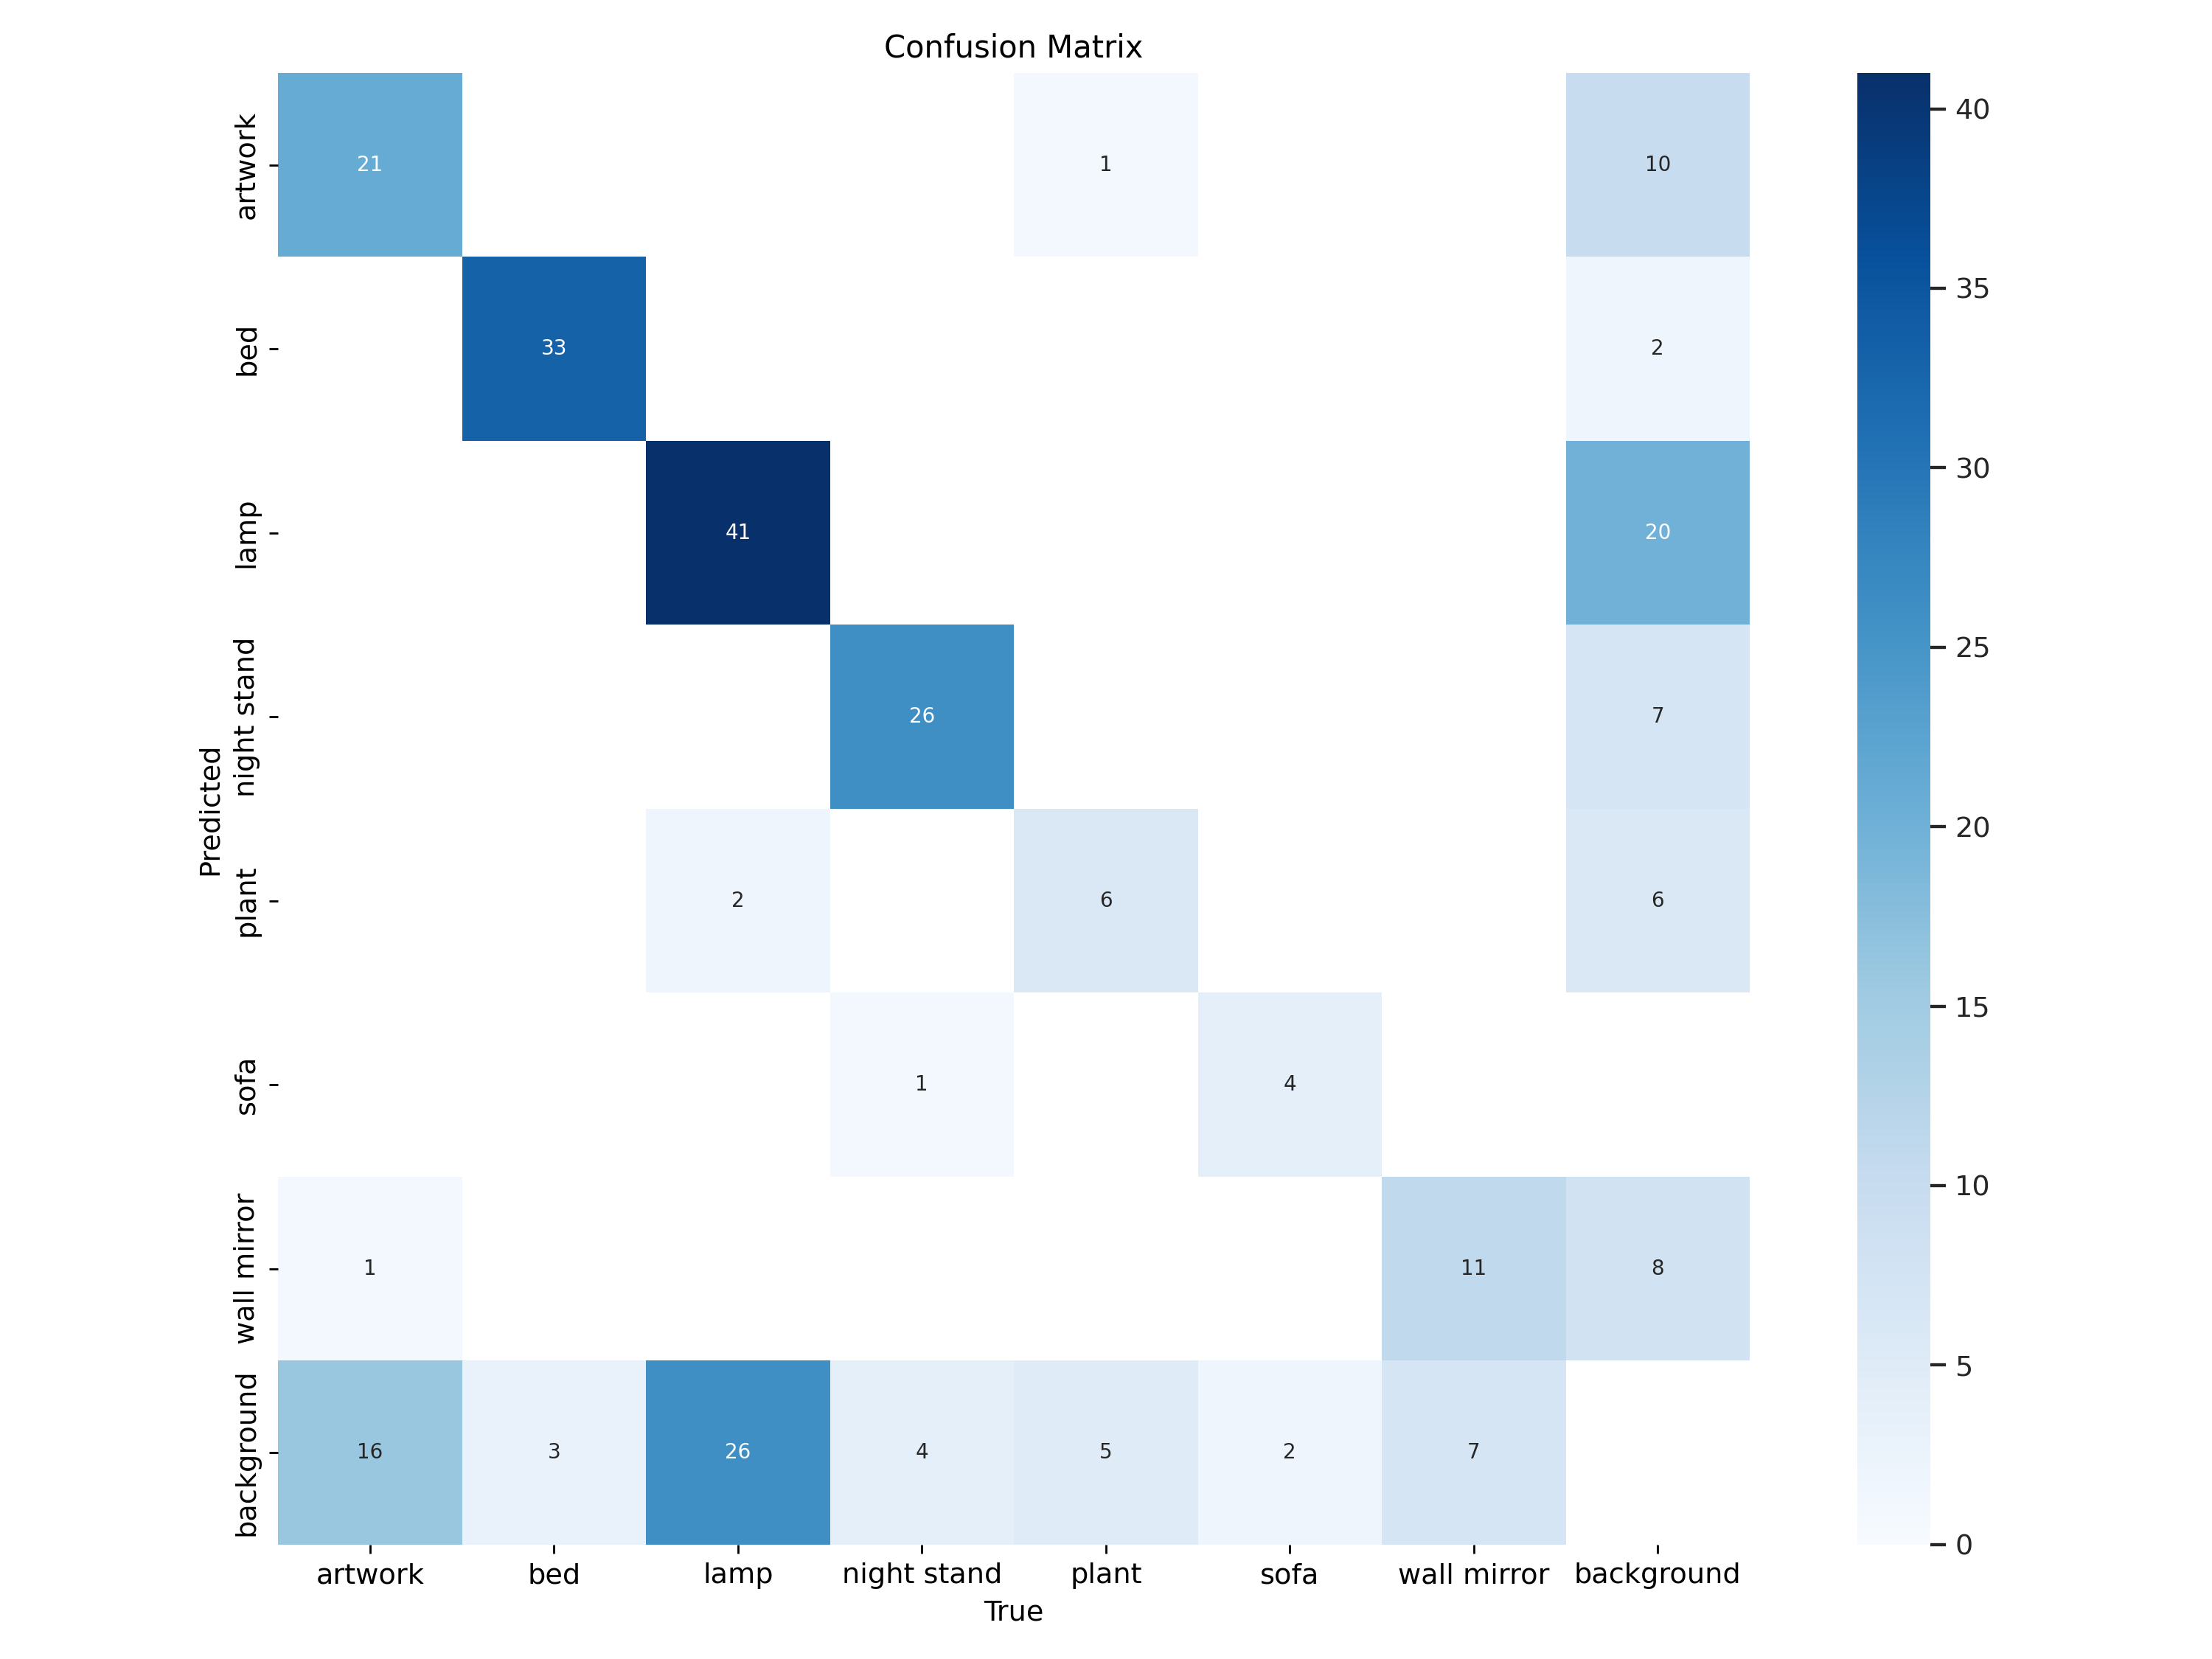

In [17]:
from IPython.display import display, Image
from IPython import display
display.clear_output()
Image(filename=f'/kaggle/working/runs/detect/custom_yolov8/confusion_matrix.png', width=1000)

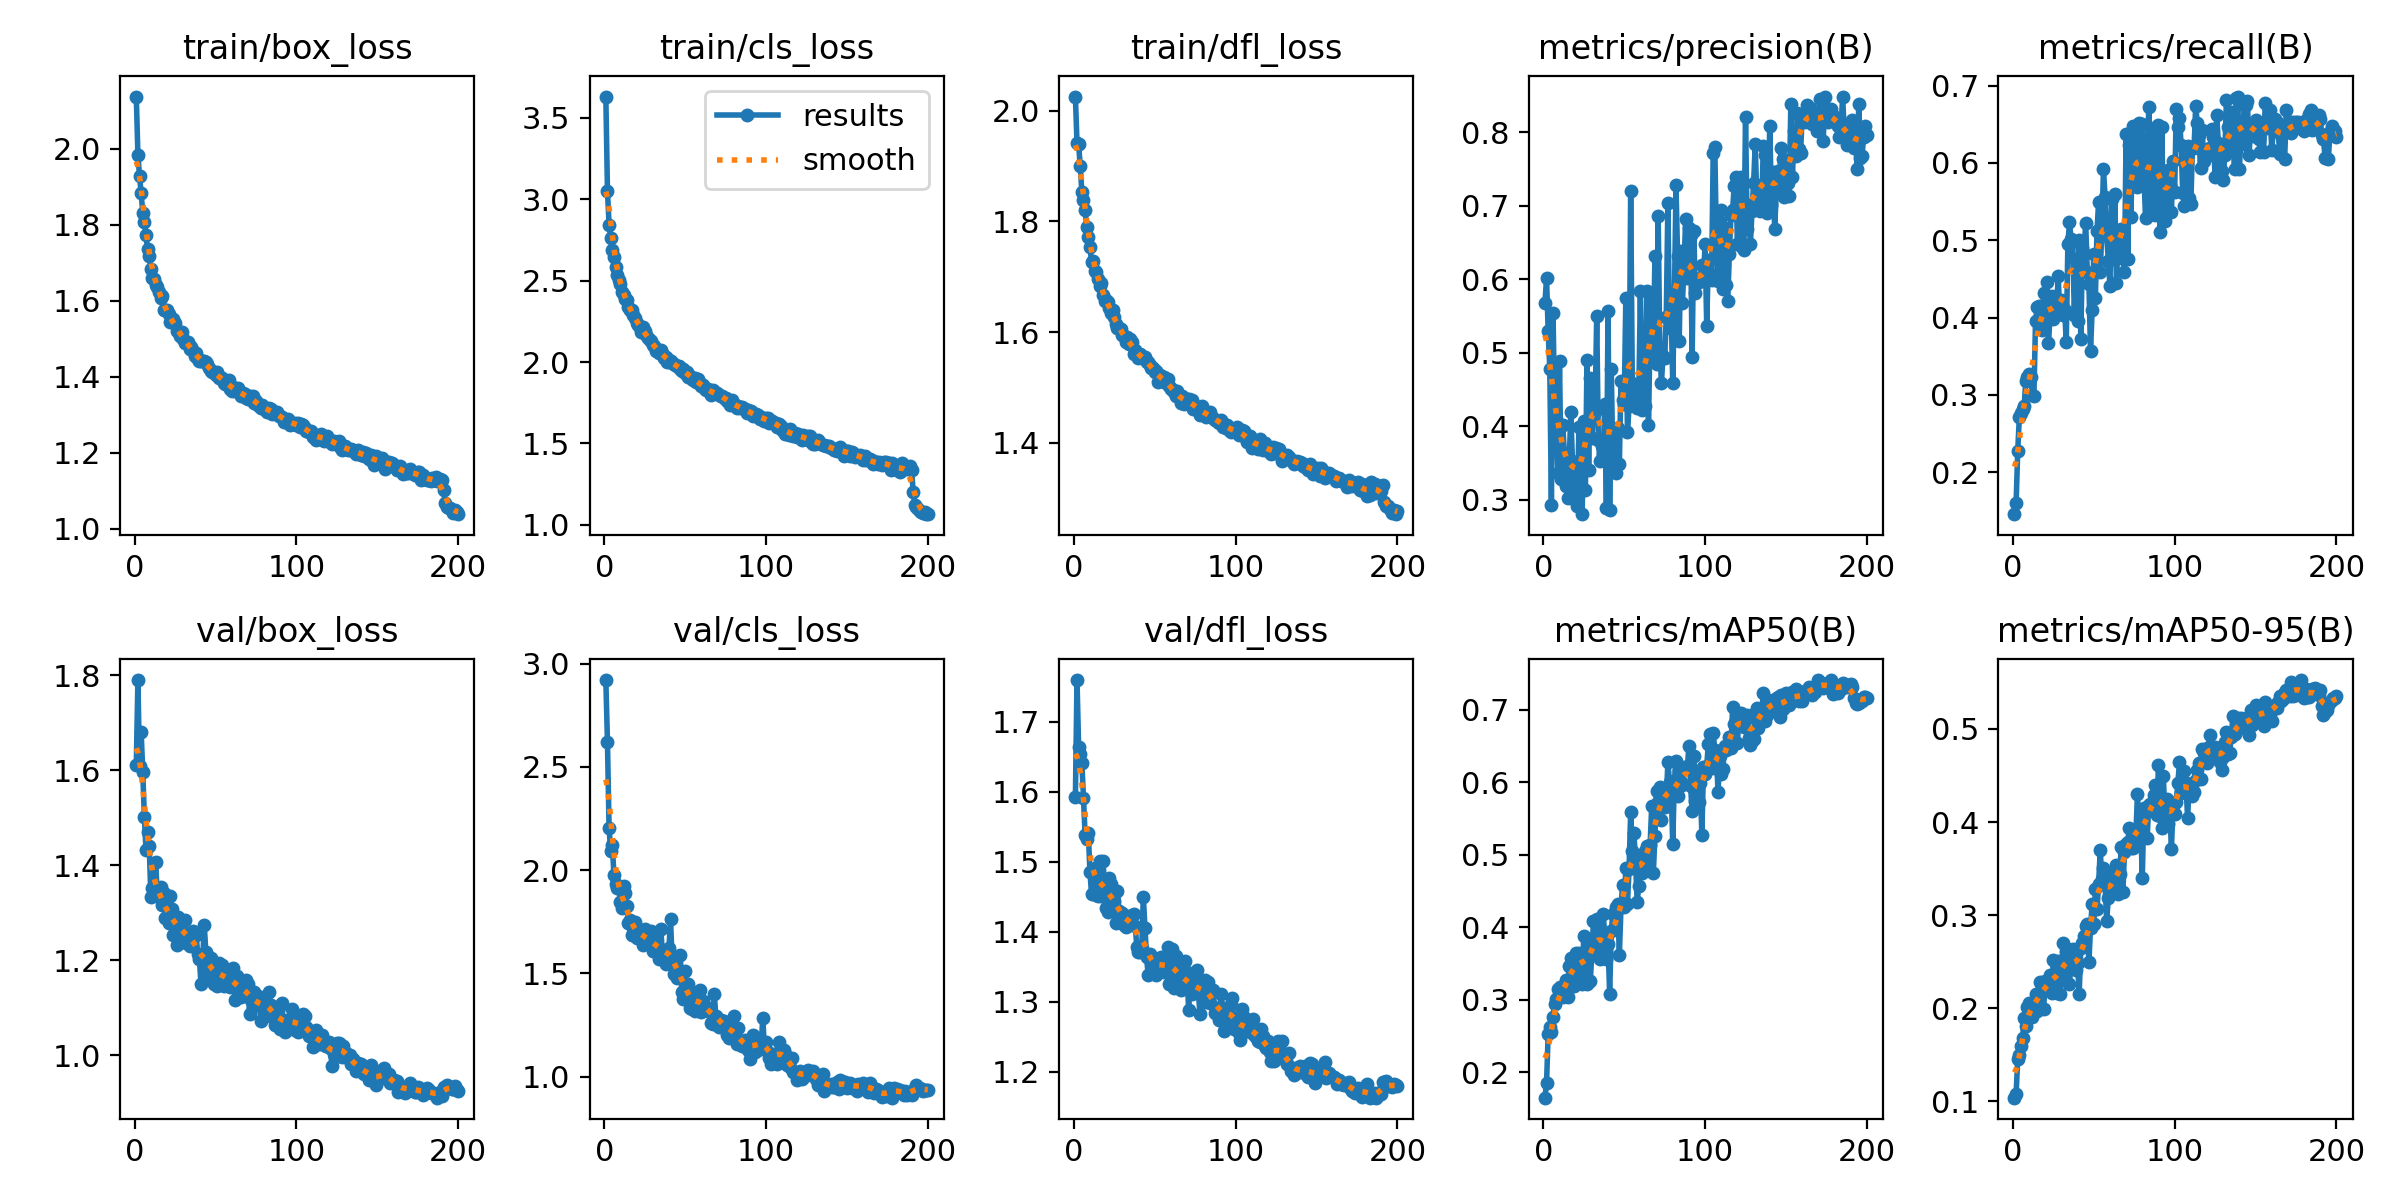

In [18]:
Image(filename=f'/kaggle/working/runs/detect/custom_yolov8/results.png', width=1000)

In [19]:
!yolo task = detect mode = val model='/kaggle/working/runs/detect/custom_yolov8/weights/best.pt' data = '/kaggle/input/yolo-mo/Model/data.yaml'

Ultralytics 8.3.8 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs
val: Scanning /kaggle/input/yolo-m/Model/datasets/valid/labels... 27 images, 0 b
val: WARNING ⚠️ Cache directory /kaggle/input/yolo-m/Model/datasets/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 105, len(boxes) = 210. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         27        210      0.832       0.65      0.741      0.552
               artwork         20         38      0.774        0.5      0.631      0.494
                   bed         27         36      0.946      0.917      0.971      0.835
                  lamp

In [20]:
!yolo task = detect mode = predict model='/kaggle/working/runs/detect/custom_yolov8/weights/best.pt' data = '/kaggle/input/yolo-mo/Model/data.yaml' conf = 0.25 source = '/kaggle/input/yolo-mo/Model/datasets/test/images' save=True, save_txt=True

WARNING ⚠️ argument 'save=True,' does not require trailing comma ',', updating to 'save=True'.
Ultralytics 8.3.8 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs

image 1/13 /kaggle/input/yolo-mo/Model/datasets/test/images/00002_jpg.rf.fcf45cc27180c78a99c06d778b8805ec.jpg: 640x640 1 bed, 7.2ms
image 2/13 /kaggle/input/yolo-mo/Model/datasets/test/images/00007_jpg.rf.9755b9f101a1dd0aa784fc2e61d37fa8.jpg: 640x640 2 artworks, 1 bed, 3 lamps, 1 night stand, 1 plant, 1 wall mirror, 7.1ms
image 3/13 /kaggle/input/yolo-mo/Model/datasets/test/images/00017_jpg.rf.23b0afe47532d56d86702030bb3a9dda.jpg: 640x640 1 bed, 2 lamps, 1 night stand, 7.1ms
image 4/13 /kaggle/input/yolo-mo/Model/datasets/test/images/00018_jpg.rf.e1b178f8e1469337e8d9351b4091cfcd.jpg: 640x640 1 bed, 1 lamp, 1 sofa, 8.3ms
image 5/13 /kaggle/input/yolo-mo/Model/datasets/test/images/00050_jpg.rf.2eaebc792b41ded3bcfd44e7230021e3.jp

In [21]:
!ls runs/detect/predict/labels

00002_jpg.rf.fcf45cc27180c78a99c06d778b8805ec.txt
00007_jpg.rf.9755b9f101a1dd0aa784fc2e61d37fa8.txt
00017_jpg.rf.23b0afe47532d56d86702030bb3a9dda.txt
00018_jpg.rf.e1b178f8e1469337e8d9351b4091cfcd.txt
00050_jpg.rf.2eaebc792b41ded3bcfd44e7230021e3.txt
00063_jpg.rf.26f6a3e8998362c09ccfb7cac6216f01.txt
00066_jpg.rf.186239acdb98d5c884541928d8e3978f.txt
00068_jpg.rf.0adc0ac6b527d7031f08640bf7f2db22.txt
00076_jpg.rf.7b9cac4d79d30505180ebb15eabaf5d1.txt
00079_jpg.rf.9e3e65d91ae9c9d081f3e5427e192293.txt
00082_jpg.rf.24f1c0abd9bfcda7b3ca8a553e7811e8.txt
00089_jpg.rf.b1311dce5df9ea314cd9616a13f443e1.txt
00090_jpg.rf.e5d7b29a1c062a1d5a383a5064924300.txt


In [22]:
import os
import pandas as pd

# Define the path where ground truth labels are located
ground_truth_dir = '/kaggle/input/yolo-mo/Model/datasets/test/labels'

# Create a DataFrame for ground truth labels
ground_truth_data = []

for label_file in os.listdir(ground_truth_dir):
    if label_file.endswith('.txt'):  # Assuming labels are stored in .txt files
        image_file = label_file.replace('.txt', '.jpg')  # Replace with actual image extension if different
        with open(os.path.join(ground_truth_dir, label_file), 'r') as file:
            for line in file:
                label_info = line.strip().split()
                class_id = int(label_info[0])  # First entry in YOLO label format is the class ID
                center_x = float(label_info[1])  # Center x-coordinate
                center_y = float(label_info[2])  # Center y-coordinate
                width = float(label_info[3])      # Width of the bounding box
                height = float(label_info[4]) 
                 # Append all parameters to ground truth data
                ground_truth_data.append({
                    'image_file': image_file,
                    'class_id': class_id,
                    'center_x': center_x,
                    'center_y': center_y,
                    'width': width,
                    'height': height
                })

# Convert to DataFrame and save
ground_truth_df = pd.DataFrame(ground_truth_data)
ground_truth_df.to_csv('/kaggle/working/test_labels2.csv', index=False)
print("Ground truth CSV created at '/kaggle/working/test_labels2.csv'")


Ground truth CSV created at '/kaggle/working/test_labels2.csv'


In [23]:
import pandas as pd
import os

# Paths to predictions and ground truth files
predictions_path = '/kaggle/working/runs/detect/predict/labels'  # Adjust as needed
ground_truth_path = '/kaggle/working/test_labels2.csv'  # Adjust to your ground truth path

# Load ground truth labels
ground_truth = pd.read_csv(ground_truth_path)

# Rename the column to 'filename' for consistency
ground_truth.rename(columns={'image_file': 'filename'}, inplace=True)

# Prepare a list to collect prediction data
predictions_data = []

# Iterate through predicted label files
for pred_file in os.listdir(predictions_path):
    if pred_file.endswith('.txt'):  # Ensure you're only checking prediction files
        # Construct the corresponding image filename
        image_filename = pred_file.replace('.txt', '.jpg')  # Assuming the images are in jpg format
        print(f"Checking for predictions file: {pred_file}")  # Debug: Print the prediction file path
        
        pred_file_path = os.path.join(predictions_path, pred_file)
        if os.path.exists(pred_file_path):
            print(f"Found predictions file: {pred_file_path}")  # Debug: Confirm file found
            with open(pred_file_path, 'r') as f:
                predictions = f.readlines()
                
            # Process each prediction
            for pred in predictions:
                pred_data = pred.strip().split()
                class_id = int(pred_data[0])  # Assuming class ID is the first entry
                confidence = float(pred_data[1])  # Confidence score
                bbox = [float(coord) for coord in pred_data[2:]]  # Bounding box coordinates

                # Append the result
                predictions_data.append({
                    'filename': image_filename,
                    'class_id': class_id,
                    'confidence': confidence,
                    'bbox': bbox
                })
        else:
            print(f"No predictions file found for: {pred_file}")  # Debug: Print if file is not found

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions_data)

# Check if predictions_df has data before merging
if not predictions_df.empty:
    # Merge with ground truth
    merged_df = pd.merge(predictions_df, ground_truth, on='filename', how='outer', suffixes=('_pred', '_gt'))

    # Save the merged results to a CSV file if the merge was successful
    output_csv_path = '/kaggle/working/predictions_with_ground_truth.csv'  # Adjust as needed
    merged_df.to_csv(output_csv_path, index=False)
    print(f"Predictions saved to {output_csv_path}")
else:
    print("No predictions were collected. Please check the predictions path and format.")


Checking for predictions file: 00017_jpg.rf.23b0afe47532d56d86702030bb3a9dda.txt
Found predictions file: /kaggle/working/runs/detect/predict/labels/00017_jpg.rf.23b0afe47532d56d86702030bb3a9dda.txt
Checking for predictions file: 00018_jpg.rf.e1b178f8e1469337e8d9351b4091cfcd.txt
Found predictions file: /kaggle/working/runs/detect/predict/labels/00018_jpg.rf.e1b178f8e1469337e8d9351b4091cfcd.txt
Checking for predictions file: 00068_jpg.rf.0adc0ac6b527d7031f08640bf7f2db22.txt
Found predictions file: /kaggle/working/runs/detect/predict/labels/00068_jpg.rf.0adc0ac6b527d7031f08640bf7f2db22.txt
Checking for predictions file: 00002_jpg.rf.fcf45cc27180c78a99c06d778b8805ec.txt
Found predictions file: /kaggle/working/runs/detect/predict/labels/00002_jpg.rf.fcf45cc27180c78a99c06d778b8805ec.txt
Checking for predictions file: 00066_jpg.rf.186239acdb98d5c884541928d8e3978f.txt
Found predictions file: /kaggle/working/runs/detect/predict/labels/00066_jpg.rf.186239acdb98d5c884541928d8e3978f.txt
Checking f

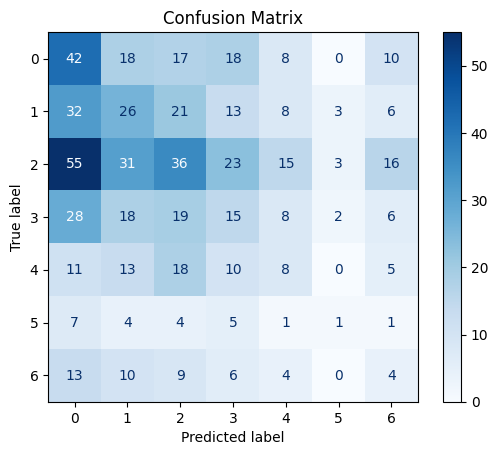

Class 0:
  True Positives (TP): 42
  False Positives (FP): 146
  False Negatives (FN): 71
  True Negatives (TN): 372

Class 1:
  True Positives (TP): 26
  False Positives (FP): 94
  False Negatives (FN): 83
  True Negatives (TN): 428

Class 2:
  True Positives (TP): 36
  False Positives (FP): 88
  False Negatives (FN): 143
  True Negatives (TN): 364

Class 3:
  True Positives (TP): 15
  False Positives (FP): 75
  False Negatives (FN): 81
  True Negatives (TN): 460

Class 4:
  True Positives (TP): 8
  False Positives (FP): 44
  False Negatives (FN): 57
  True Negatives (TN): 522

Class 5:
  True Positives (TP): 1
  False Positives (FP): 8
  False Negatives (FN): 22
  True Negatives (TN): 600

Class 6:
  True Positives (TP): 4
  False Positives (FP): 44
  False Negatives (FN): 42
  True Negatives (TN): 541

Overall Accuracy: 0.77


In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the merged predictions and ground truth data
merged_df = pd.read_csv('/kaggle/working/predictions_with_ground_truth.csv')

# Extract true labels and predicted labels, filling missing values with -1 for 'no data'
y_true = merged_df['class_id_gt'].fillna(-1).astype(int)
y_pred = merged_df['class_id_pred'].fillna(-1).astype(int)

# Create a confusion matrix with unique labels from both y_true and y_pred
unique_labels = np.unique(np.concatenate((y_true, y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN) for each class
TP = np.diag(cm)  # Correctly classified for each class
FP = cm.sum(axis=0) - TP  # Predicted as a class but not actually that class
FN = cm.sum(axis=1) - TP  # Actual instances of a class not predicted as that class
TN = cm.sum() - (FP + FN + TP)  # Correctly classified as not belonging to each class

# Print metrics for each class
for idx, label in enumerate(unique_labels):
    print(f'Class {label}:')
    print(f'  True Positives (TP): {TP[idx]}')
    print(f'  False Positives (FP): {FP[idx]}')
    print(f'  False Negatives (FN): {FN[idx]}')
    print(f'  True Negatives (TN): {TN[idx]}')
    print('')

# Calculate total TP, TN, FP, and FN across all classes
total_TP = TP.sum()
total_FP = FP.sum()
total_FN = FN.sum()
total_TN = TN.sum()

# Calculate and print the overall accuracy
overall_accuracy = (total_TP + total_TN) / (total_TP + total_TN + total_FP + total_FN)  # (TP + TN) / (TP + TN + FP + FN)
print(f'Overall Accuracy: {overall_accuracy:.2f}')


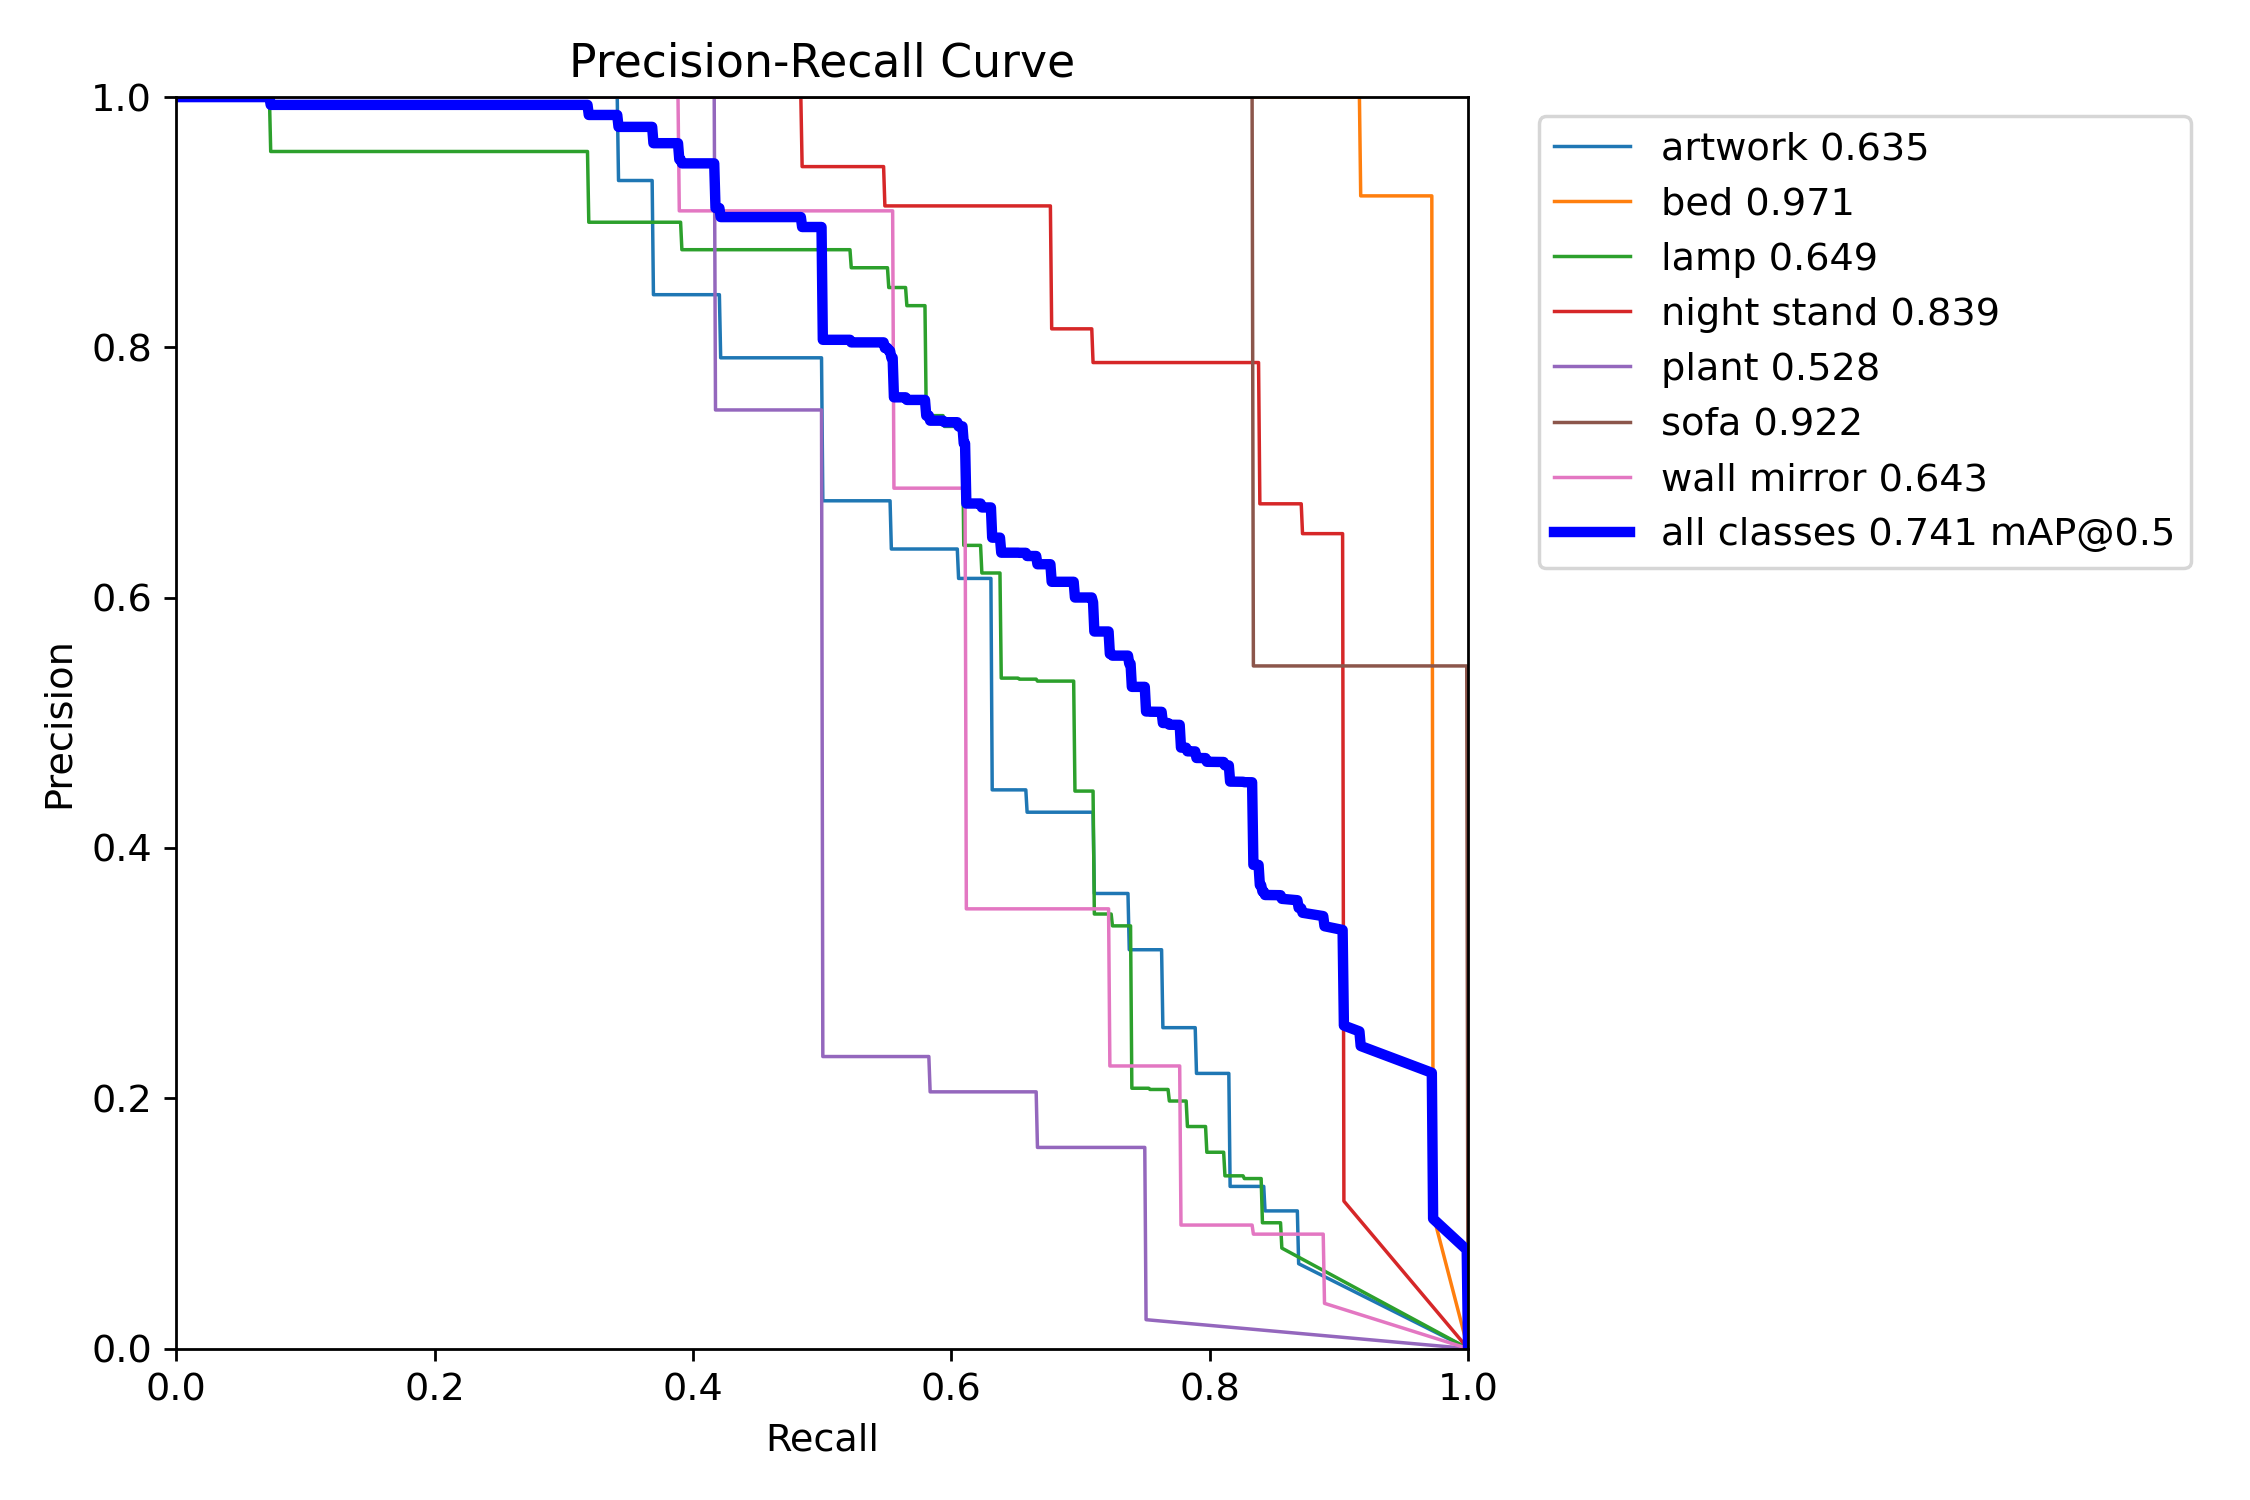

In [25]:
Image(filename=f'/kaggle/working/runs/detect/custom_yolov8/PR_curve.png', width=1000)

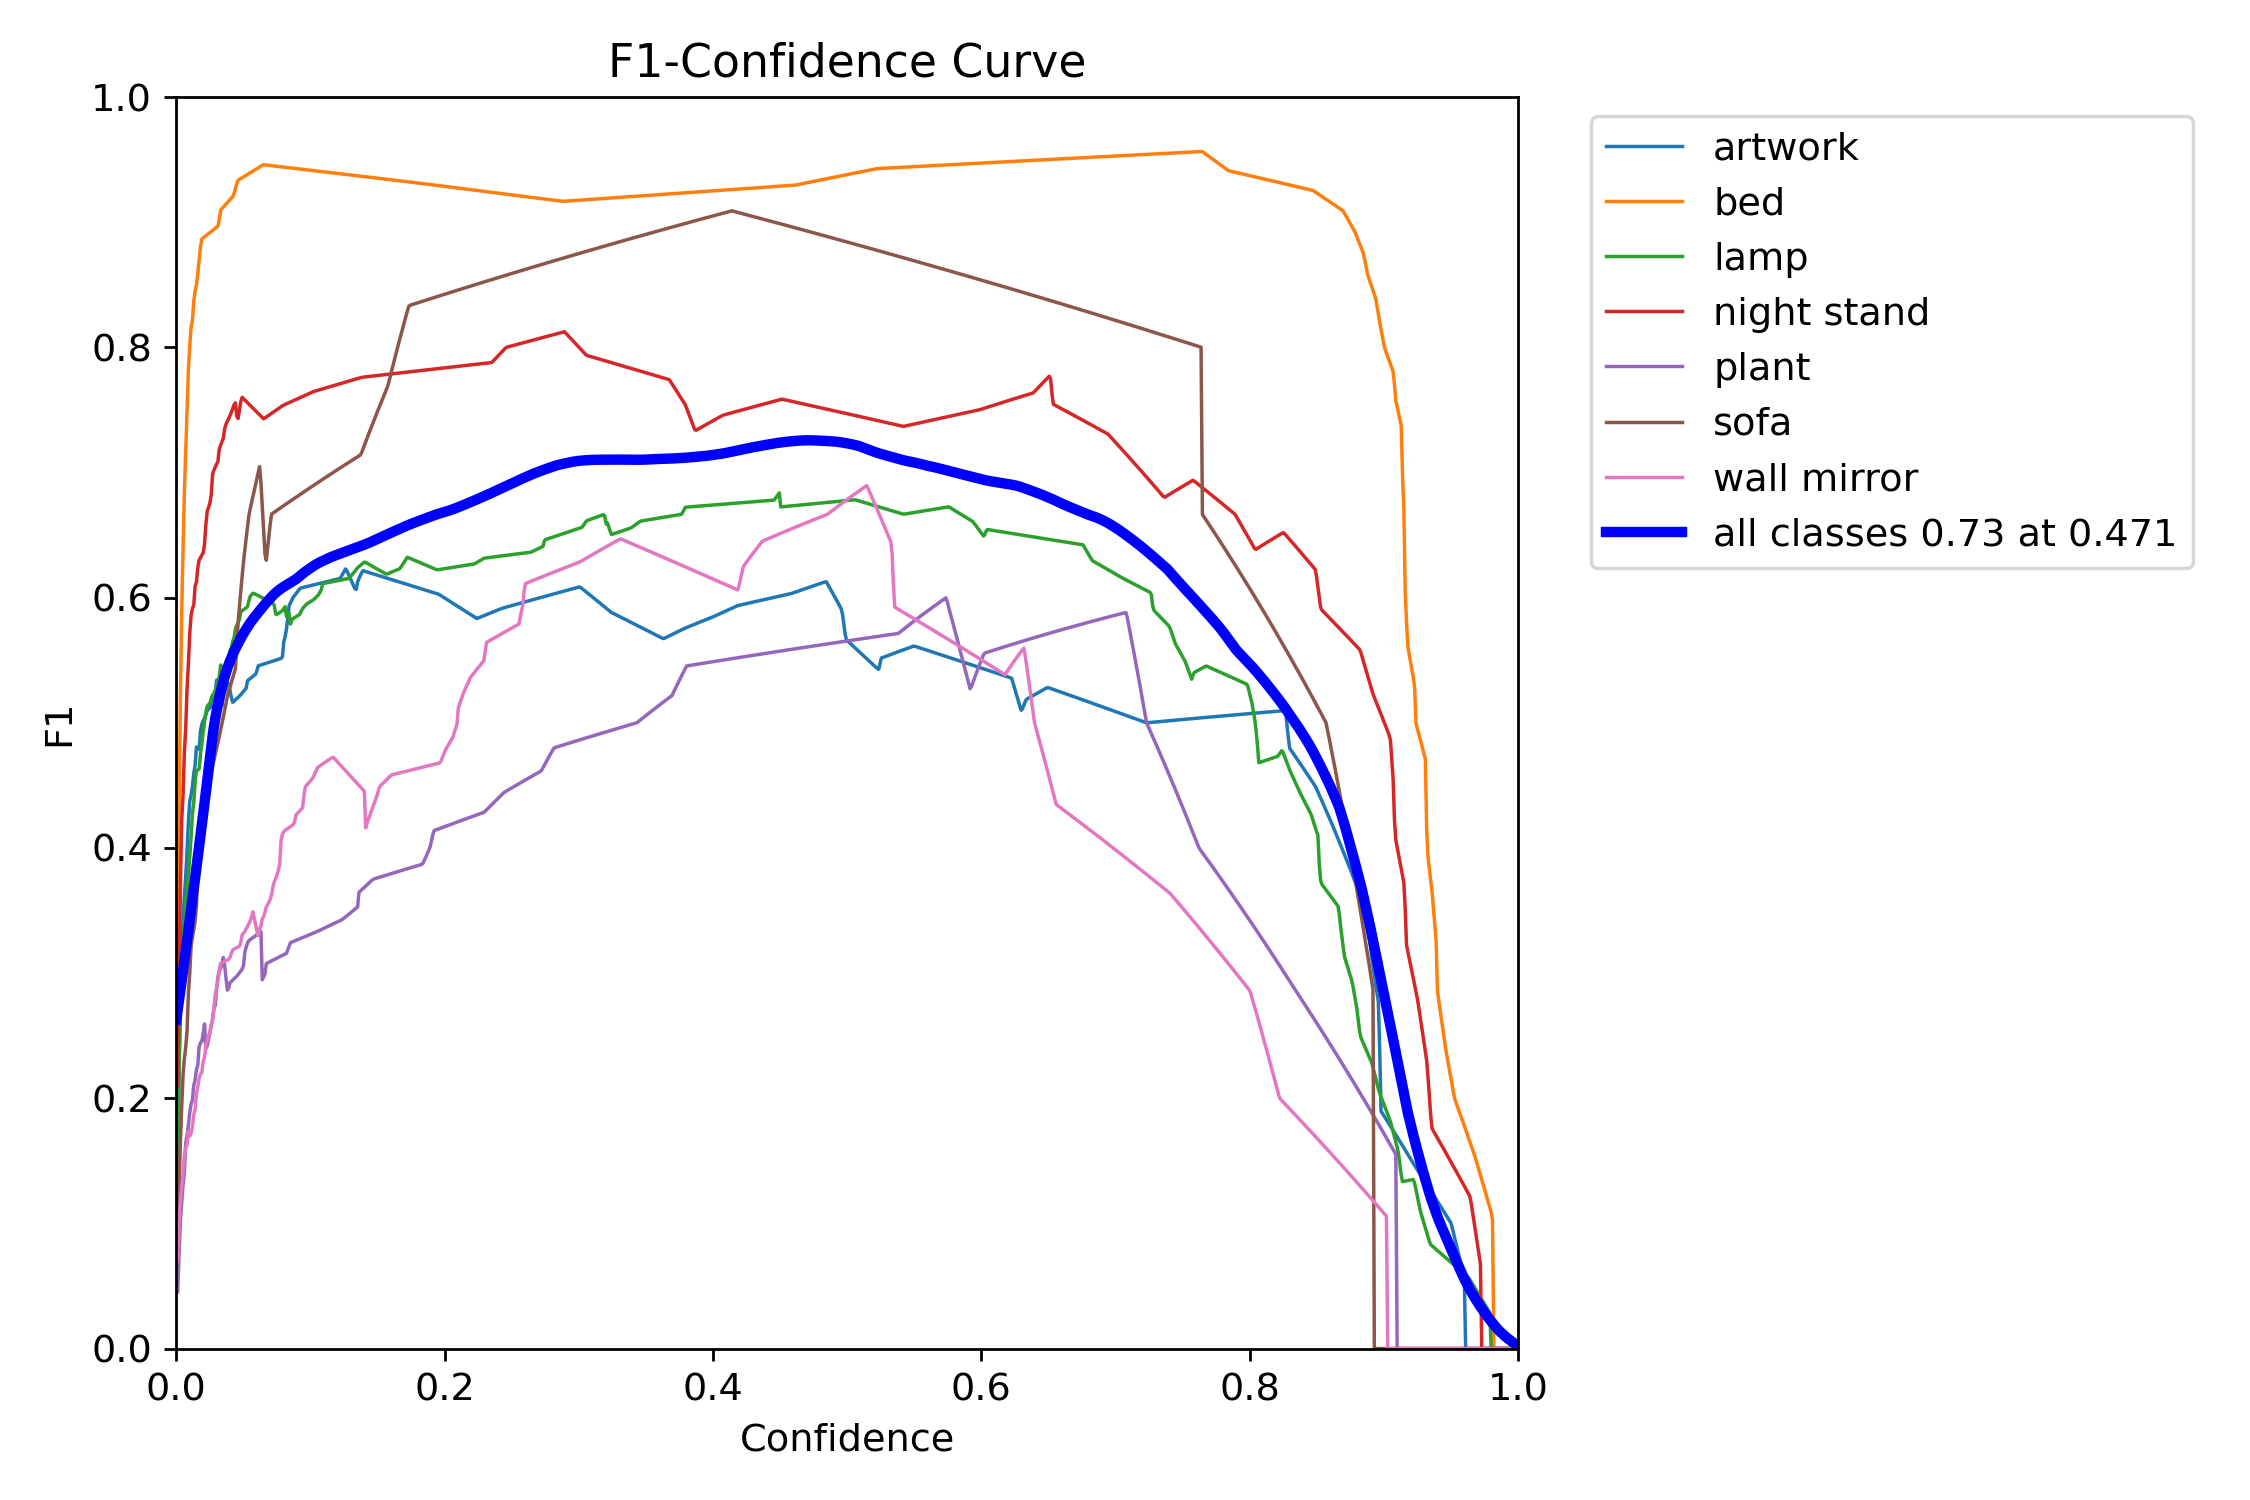

In [26]:
Image(filename=f'/kaggle/working/runs/detect/custom_yolov8/F1_curve.png', width=1000)

In [27]:
# Input text data as a multi-line string
data = """
lr/pg0	1e-05
lr/pg1	1e-05
lr/pg2	1e-05
metrics/mAP50(B)	0.74113
metrics/mAP50-95(B)	0.5519
metrics/precision(B)	0.83248
metrics/recall(B)	0.64943
model/GFLOPs	6.949
model/parameters	2691573
model/speed_PyTorch(ms)	4.42
train/box_loss	1.03826
train/cls_loss	1.06858
train/dfl_loss	1.27701
val/box_loss	0.92527
val/cls_loss	0.93747
val/dfl_loss	1.17971
"""

# Split the data into lines
lines = data.strip().split('\n')

# Initialize variables for precision and recall
precision = None
recall = None

# Iterate through each line to find precision and recall
for line in lines:
    if 'metrics/precision(B)' in line:
        precision = float(line.split('\t')[1])  # Extract precision
    elif 'metrics/recall(B)' in line:
        recall = float(line.split('\t')[1])  # Extract recall

# Print the results
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')


Precision: 0.83248
Recall: 0.64943


In [28]:
!zip -r folder.zip /kaggle/working/runs

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/00076_jpg.rf.7b9cac4d79d30505180ebb15eabaf5d1.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00007_jpg.rf.9755b9f101a1dd0aa784fc2e61d37fa8.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/00050_jpg.rf.2eaebc792b41ded3bcfd44e7230021e3.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00082_jpg.rf.24f1c0abd9bfcda7b3ca8a553e7811e8.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/00017_jpg.rf.23b0afe47532d56d86702030bb3a9dda.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00066_jpg.rf.186239acdb98d5c884541928d8e3978f.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00089_jpg.rf.b1311dce5df9ea314cd9616a13f443e1.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/00018_jpg.rf.e1b178f8e1469337e8d9351b4091

In [29]:
!zip -r Yolo.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/test_labels2.csv (deflated 78%)
  adding: kaggle/working/wandb/ (stored 0%)
  adding: kaggle/working/wandb/debug-internal.log (deflated 72%)
  adding: kaggle/working/wandb/debug.log (deflated 75%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/ (stored 0%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/ (stored 0%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/media/ (stored 0%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/media/table/ (stored 0%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/media/table/curves/ (stored 0%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/media/table/curves/F1-Confidence(B)_table_200_47458b54e2127a09e1cf.table.json (deflated 82%)
  adding: kaggle/working/wandb/run-20241009_111017-ccr1h11l/files/media/table/curves/Recall-Confidence(B

In [31]:
from IPython.display import FileLink
FileLink(r'Yolo.zip')

/kaggle/working/Yolo.zip

In [32]:
model.save("yolov8_model.pt")
